In [3]:
#import packages
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Bidirectional

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv("/Users/mac/Desktop/OrderPredictions/dfp_100017_file.csv")

#print the head
df

,LKP_ARTIKEL,FACTUUR_DATUM,NETTO_GEWICHT_KG
0,100017,2018-01-12,114.0
1,100017,2018-03-12,24.0
2,100017,2018-04-12,12.0
3,100017,2018-05-12,36.0
4,100017,2018-06-12,528.0
5,100017,2018-07-12,12.0
6,100017,2018-08-12,48.0
7,100017,2018-10-12,12.0
8,100017,2018-11-12,300.0
9,100017,2018-11-28,870.0


In [4]:
df.shape

(240, 3)

In [5]:
df.loc[df['NETTO_GEWICHT_KG'].idxmax()]

LKP_ARTIKEL             100017
FACTUUR_DATUM       2018-11-28
NETTO_GEWICHT_KG           870
Name: 9, dtype: object

In [6]:
start_date = '2018-11-30'
mask = (df['FACTUUR_DATUM'] > start_date)
df = df.loc[mask]
df.head()

,LKP_ARTIKEL,FACTUUR_DATUM,NETTO_GEWICHT_KG
11,100017,2018-12-12,108.0
12,100017,2018-12-13,54.0
13,100017,2018-12-14,24.0
14,100017,2018-12-15,60.0
15,100017,2018-12-17,12.0


In [7]:
df.shape

(229, 3)

In [8]:
df.dtypes

LKP_ARTIKEL           int64
FACTUUR_DATUM        object
NETTO_GEWICHT_KG    float64
dtype: object

/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mac/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


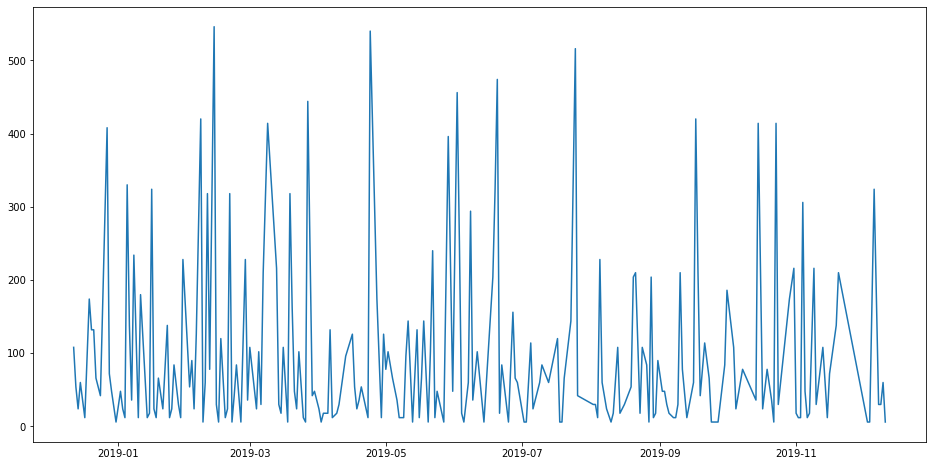

In [9]:
#setting index as date
df['FACTUUR_DATUM'] = pd.to_datetime(df.FACTUUR_DATUM,format='%Y-%m-%d')
df.index = df['FACTUUR_DATUM']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['NETTO_GEWICHT_KG'], label='Sells history')

In [19]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['FACTUUR_DATUM', 'NETTO_GEWICHT_KG'])
for i in range(0,len(data)):
    new_data['FACTUUR_DATUM'][i] = data['FACTUUR_DATUM'][i]
    new_data['NETTO_GEWICHT_KG'][i] = data['NETTO_GEWICHT_KG'][i]

#setting index
new_data.index = new_data.FACTUUR_DATUM
new_data.drop('FACTUUR_DATUM', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:160,:]
valid = dataset[160:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(15,len(train)):
    x_train.append(scaled_data[i-15:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=160, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(160))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
model.fit(x_train, y_train, epochs=3, batch_size=40, verbose=1)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 15:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(15,inputs.shape[0]):
    X_test.append(inputs[i-15:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/3
145/145 [==============================] - 7s 51ms/step - loss: 0.0689 - acc: 0.1241
Epoch 2/3
145/145 [==============================] - 1s 5ms/step - loss: 0.0603 - acc: 0.1241
Epoch 3/3
145/145 [==============================] - 1s 4ms/step - loss: 0.0593 - acc: 0.1241


In [20]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

110.14976547637758

/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


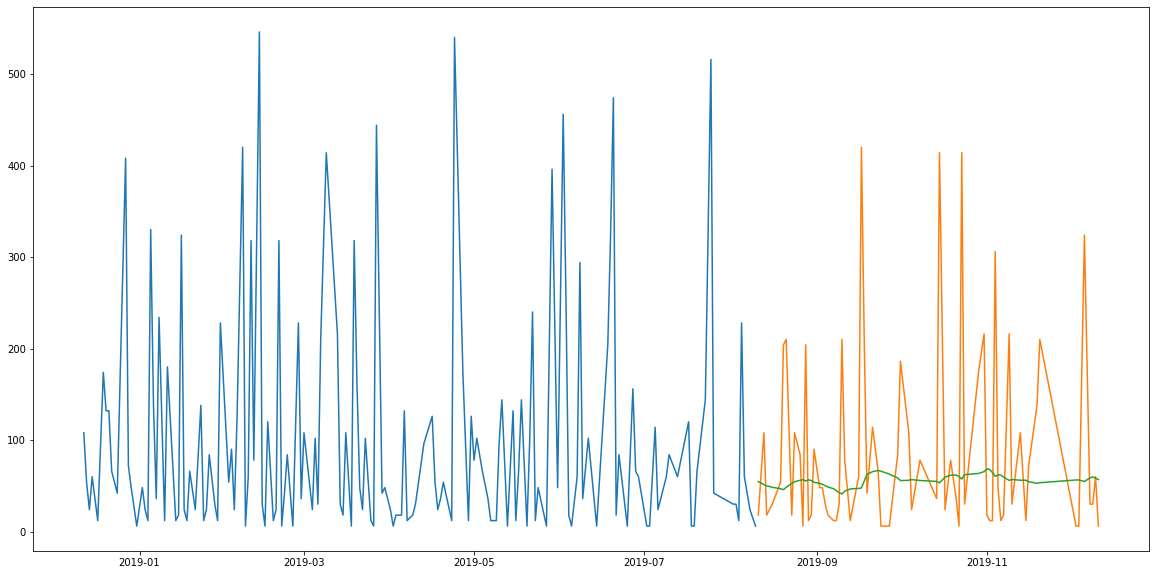

In [21]:
#for plotting
train = new_data[:160]
valid = new_data[160:]
valid['Predictions'] = closing_price
plt.plot(train['NETTO_GEWICHT_KG'])
plt.plot(valid[['NETTO_GEWICHT_KG','Predictions']])